<a href="https://colab.research.google.com/github/Jarmos-san/PumpItUp/blob/master/Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DrivenData Competition | Pump it Up: Data Mining the Water Table](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

Using data from Taarifa and the Tanzanian Ministry of Water, can you **predict which pumps are functional**, which **need some repairs**, and which **don't work at all**? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of **pump is operating**, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

---

Goal - ***Predict faulty water pumps.***

[Discussion Forums](https://community.drivendata.org/c/pump-it-up-data-mining-the-water-table)

Problem Description has 3 sections:

- Features
- Labels
- Submission Format

## Features:

- `TSHAmount` - **Total static head (amount water available to waterpoint)**
- `DateOfRecording` - **The date the row was entered**
- `Funder` - **Who funded the well**
- `GPSHeight` - **Altitude of the well**
- `Installer` - **Organization that installed the well**
- `Longitude` - **GPS coordinate**
- `Latitude` - **GPS coordinate**
- `WaterPointName` - **Name of the waterpoint if there is one**
- `PrivateNum` -
- `Basin` - **Geographic water basin**
- `SubVillage` - **Geographic location**
- `Region` - **Geographic location**
- `RegionCode` - **Geographic location (coded)**
- `DistrictCode` - **Geographic location (coded)**
- `LocalGovernmentArea` - **Geographic location**
- `Ward` - **Geographic location**
- `Population` - **Population around the well**
- `PublicMeeting` - **True/False**
- `RecordedBy` - **Group entering this row of data**
- `SchemeManager` - **Who operates the waterpoint**
- `SchemeName` - **Who operates the waterpoint**
- `Permit` - **If the waterpoint is permitted**
- `YearOfConstruction` - **Year the waterpoint was constructed**
- `ExtractionType` - **The kind of extraction the waterpoint uses**
- `ExtractionTypeGroup` - **The kind of extraction the waterpoint uses**
- `ExtractionTypeClass` - **The kind of extraction the waterpoint uses**
- `MangementType` - **How the waterpoint is managed**
- `ManagementGroup` - **How the waterpoint is managed**
- `OperationCosts` - **What the water costs**
- `PaymentType` - **What the water costs**
- `WaterQuality` - **The quality of the water**
- `Qualityroup` - **The quality of the water**
- `Quantity` - **The quantity of water**
- `QuantityGroup` - **The quantity of water**
- `Source` - **The source of the water**
- `SourceType` - **The source of the water**
- `SourceClass` - **The source of the water**
- `WaterPointType` - **The kind of waterpoint**
- `WaterPointTypeGroup` - **The kind of waterpoint**

## Labels:

- `functional` - **the waterpoint is operational and there are no repairs needed**
- `functional needs repair` - **the waterpoint is operational, but needs repairs**
- `non functional` - **the waterpoint is not operational**

## Submission Format:

id 	  | status_group |
------|--------------|
50785 |	functional   |
51630 |	functional   |
17168 |	functional   |
45559 |	functional   |
49871 |	functional   |

## Data Download:

File 	                                                                                                            | Description                                       |
------------------------------------------------------------------------------------------------------------------|---------------------------------------------------|
[Submission format](https://s3.amazonaws.com/drivendata/data/7/public/SubmissionFormat.csv)                       |	The format for submitting your predictions        |
[Test Set Values](https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv)     |	The independent variables that need predictions   |
[Training Set Labels](https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv) |	The dependent variable (status_group) for each of the rows in Training set values   |
[Training Set Values](https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv) | The independent variables for the training set    |

# Importing Necessary Libraries

- **Pandas** *v0.25.3*
- **Numpy** *v1.17.5*
- **Missingno** *v0.4.2*
- **Seaborn** *v0.10.0*

In [1]:
# Loading necessary libraries
import pandas as pd
import missingno

# Checking the version for easier debugging at some point of time.
# print(f'Python v{python3.__version__}')
print(f'Pandas v{pd.__version__}')
print(f'Missingno v{missingno.__version__}')

Pandas v0.25.3
Missingno v0.4.2


# Dataset Overview

In [0]:
PATH = 'https://s3.amazonaws.com/drivendata/data/7/public/'

# Load .csv file directly from the provided links
SubmissionFormat = pd.read_csv(f'{PATH}SubmissionFormat.csv')
TestSet = pd.read_csv(f'{PATH}702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv', parse_dates=['date_recorded'])
TrainLabels = pd.read_csv(f'{PATH}0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
TrainSet = pd.read_csv(f'{PATH}4910797b-ee55-40a7-8668-10efd5c1b960.csv', parse_dates=['date_recorded'])

# Make a copy of the original files for processing
TrainData = TrainSet.copy()
TestData = TestSet.copy()

In [3]:
# This is how the Submission File be like
SubmissionFormat.head(3)

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label


In [4]:
# Taking a look at the Training Labels file
TrainLabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# Checking out the shape of the Train & Test set
print(f'Training set has {TrainData.shape[0]} rows & {TrainData.shape[1]} columns')
print(f'Training labels has {TrainLabels.shape[0]} rows & {TrainLabels.shape[1]} columns')
print(f'Test set has {TestData.shape[0]} rows & {TestData.shape[1]} columns')

Training set has 59400 rows & 40 columns
Training labels has 59400 rows & 2 columns
Test set has 14850 rows & 40 columns


In [6]:
# First 5 rows of the Tranining set
TrainData.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
# First 5 rows of the Testing set
TestData.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [8]:
# Checking the Training set column names
TrainData.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [9]:
# Checking the Testing set column names
print(TestData.columns)
type(TestData.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


pandas.core.indexes.base.Index

In [10]:
# Check Training set datatypes
TrainData.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


In [11]:
# Checking Testing set datatype
TestData.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
installer                        object
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
subvillage                       object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
public_meeting                   object
recorded_by                      object
scheme_management                object
scheme_name                      object
permit                           object
construction_year                 int64
extraction_type                  object


# Checking for Missing Values

In [0]:
def checkNullValues(data):
    """
    Function to check for missing values
    
    Arguments
    --------
    data: Accepts a dataset

    Returns
    -------
    A list of dicts with variable names as index and the respective values as 
    the percentage of missing value in that column. Besides a Missingno Matrix
    graph is also returned.
    """

    print('Number of Missing Values are:')

    nullValue = data.isnull().sum()     # Sum of all missing value in a column
    nRows = data.shape[0]               # Total number of rows in the dataset
    
    for index, value in nullValue.items():
        if value != 0:
            print(f'{index}: {value}({round(value/nRows*100)})%')

    print('\nVisualization of the Number of Missing Values')
    missingno.matrix(data, figsize=(18,5))

Number of Missing Values are:
funder: 3635(6)%
installer: 3655(6)%
subvillage: 371(1)%
public_meeting: 3334(6)%
scheme_management: 3877(7)%
scheme_name: 28166(47)%
permit: 3056(5)%

Visualization of the Number of Missing Values


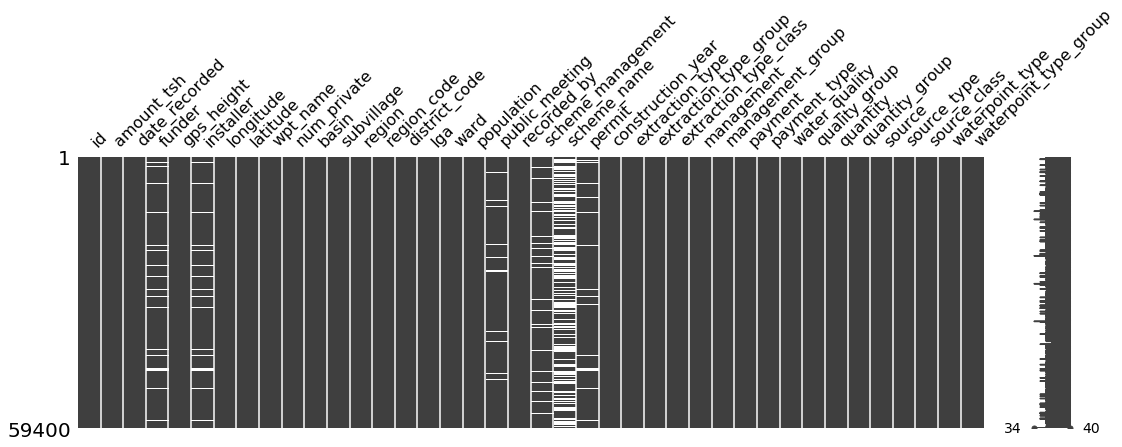

In [13]:
# Missing values from the Training set
checkNullValues(TrainData)

Number of Missing Values are:
funder: 869(6)%
installer: 877(6)%
subvillage: 99(1)%
public_meeting: 821(6)%
scheme_management: 969(7)%
scheme_name: 7092(48)%
permit: 737(5)%

Visualization of the Number of Missing Values


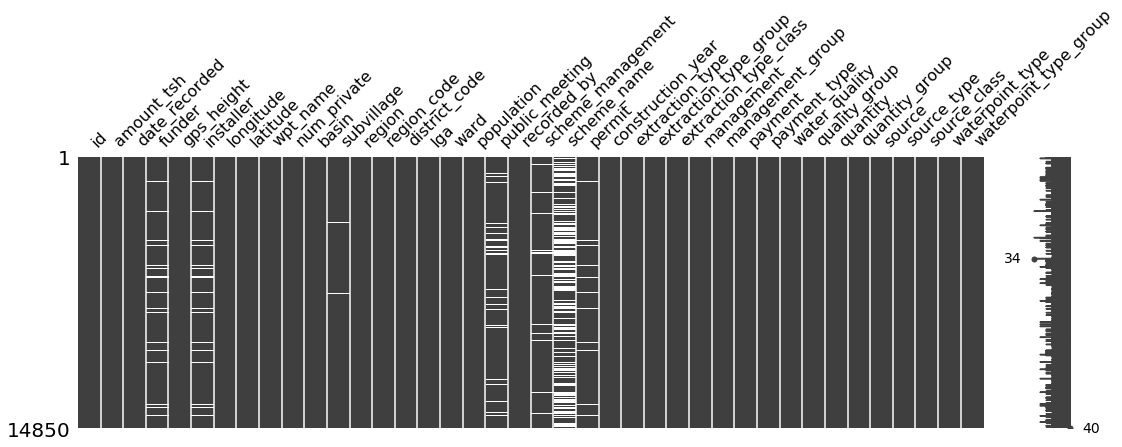

In [14]:
# Missing Values from the Testing set
checkNullValues(TestData)

# Checking For Some Categorical Variables

In [16]:
list(TrainData['basin'].unique())

['Lake Nyasa',
 'Lake Victoria',
 'Pangani',
 'Ruvuma / Southern Coast',
 'Internal',
 'Lake Tanganyika',
 'Wami / Ruvu',
 'Rufiji',
 'Lake Rukwa']

In [17]:
list(TrainData['region'].unique())

['Iringa',
 'Mara',
 'Manyara',
 'Mtwara',
 'Kagera',
 'Tanga',
 'Shinyanga',
 'Tabora',
 'Pwani',
 'Ruvuma',
 'Kilimanjaro',
 'Rukwa',
 'Mwanza',
 'Kigoma',
 'Lindi',
 'Dodoma',
 'Arusha',
 'Mbeya',
 'Singida',
 'Morogoro',
 'Dar es Salaam']

In [19]:
list(TrainData['recorded_by'].unique())

['GeoData Consultants Ltd']

In [20]:
list(TrainData['scheme_management'].unique())

['VWC',
 'Other',
 nan,
 'Private operator',
 'WUG',
 'Water Board',
 'WUA',
 'Water authority',
 'Company',
 'Parastatal',
 'Trust',
 'SWC',
 'None']

In [21]:
list(TrainData['extraction_type'].unique())

['gravity',
 'submersible',
 'swn 80',
 'nira/tanira',
 'india mark ii',
 'other',
 'ksb',
 'mono',
 'windmill',
 'afridev',
 'other - rope pump',
 'india mark iii',
 'other - swn 81',
 'other - play pump',
 'cemo',
 'climax',
 'walimi',
 'other - mkulima/shinyanga']

In [22]:
list(TrainData['extraction_type_group'].unique())

['gravity',
 'submersible',
 'swn 80',
 'nira/tanira',
 'india mark ii',
 'other',
 'mono',
 'wind-powered',
 'afridev',
 'rope pump',
 'india mark iii',
 'other handpump',
 'other motorpump']

In [23]:
list(TrainData['extraction_type_class'].unique())

['gravity',
 'submersible',
 'handpump',
 'other',
 'motorpump',
 'wind-powered',
 'rope pump']

In [24]:
list(TrainData['management'].unique())

['vwc',
 'wug',
 'other',
 'private operator',
 'water board',
 'wua',
 'company',
 'water authority',
 'parastatal',
 'unknown',
 'other - school',
 'trust']

In [25]:
list(TrainData['management_group'].unique())

['user-group', 'other', 'commercial', 'parastatal', 'unknown']

In [26]:
list(TrainData['payment'].unique())

['pay annually',
 'never pay',
 'pay per bucket',
 'unknown',
 'pay when scheme fails',
 'other',
 'pay monthly']

In [27]:
list(TrainData['payment_type'].unique())

['annually',
 'never pay',
 'per bucket',
 'unknown',
 'on failure',
 'other',
 'monthly']

In [28]:
list(TrainData['water_quality'].unique())

['soft',
 'salty',
 'milky',
 'unknown',
 'fluoride',
 'coloured',
 'salty abandoned',
 'fluoride abandoned']

In [29]:
list(TrainData['quality_group'].unique())

['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored']

In [30]:
list(TrainData['quantity'].unique())

['enough', 'insufficient', 'dry', 'seasonal', 'unknown']

In [31]:
list(TrainData['quantity_group'].unique())

['enough', 'insufficient', 'dry', 'seasonal', 'unknown']

In [32]:
list(TrainData['source'].unique())

['spring',
 'rainwater harvesting',
 'dam',
 'machine dbh',
 'other',
 'shallow well',
 'river',
 'hand dtw',
 'lake',
 'unknown']

In [33]:
list(TrainData['source_type'].unique())

['spring',
 'rainwater harvesting',
 'dam',
 'borehole',
 'other',
 'shallow well',
 'river/lake']

In [34]:
list(TrainData['source_class'].unique())

['groundwater', 'surface', 'unknown']

In [36]:
list(TrainData['waterpoint_type'].unique())

['communal standpipe',
 'communal standpipe multiple',
 'hand pump',
 'other',
 'improved spring',
 'cattle trough',
 'dam']

In [38]:
list(TrainData['waterpoint_type_group'].unique())

['communal standpipe',
 'hand pump',
 'other',
 'improved spring',
 'cattle trough',
 'dam']

# Some Observations About the Data Set

- `SchemeName` has the highest number of missing values with ~47%, from both the Training as well as the Test set.
- The `DateRecorded` is a `datetime` object so it should be possible to do some Time-Series analysis on it but not sure of the information gain from it, since its safe to assume that the column is a record of the date when the information from a particular was collected.
- A lot of the columns has string-type objects, not sure if there're any algorithms that would accept those objects for predictions.
- Some of those columns has possible categorical variables. One Examples is the `WaterPointType` which has 7 unique values.
- Some of the columns are possible duplicates to each other with some trivial difference in the values which could be informative at some point of time.
